In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
from tensorflow import keras
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
import datetime
import time
import math as m


Found GPU at: /device:GPU:0


# *DATASET* preparation

In [ ]:
#dataset preparartion class to make it easier to load the data
class DataSet:
    
    def __init__(me,location,categories,resize=True,
                 lheight=500,lwidth=500,grayscale=True,shuffled=False,
                 apply=None,count=1000,multiclass=False,enhance=False):
        me.categories=categories
        me.datadir=location
        me.lheight=lheight
        me.lwidth=lwidth
        me.grayscale=grayscale
        me.shuffled=shuffled
        me.multiclass=multiclass
        me.apply=apply
        me.count=count
        me.enhance=enhance
        me.dataset=me.create_traindata()
        if resize==True:
            me.dataset=me.resizeIt(me.dataset)

        
        
    
    def resizeIt(me,traindata_array):
        resized_traindata=[]
        resized_traindata_temp=[]
        for img in traindata_array[0]:
            
            new_image_array=cv2.resize(img,(me.lheight,me.lwidth))
            resized_traindata_temp.append(np.array(new_image_array))
        array=[np.array(resized_traindata_temp),np.array(traindata_array[1])]
        return(array)



    def create_traindata(me):
        traindata=[]
        for cats in me.categories:
            n=0
            path=os.path.join(me.datadir,cats)
            class_num=me.categories.index(cats)
            for img in os.listdir(path):
                if(me.grayscale==True and me.enhance==True):
                    y=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)

                    y=cv2.resize(y,(512,512))


                    clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(5,5))
                    img_array = clahe.apply(y)

                    img_array = cv2.GaussianBlur(y,(3,3),1)


                    n=n+1
                    print(str(n)+" images loaded successfully",end='')
                    if n>=me.count:
                      break
                
                elif(me.enhance==True):
                    img_array=cv2.imread(os.path.join(path,img))

                    img_array=cv2.resize(img_array,(512,512))

                    img_yuv_1 = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)

                    
                    img_yuv = cv2.cvtColor(img_yuv_1,cv2.COLOR_RGB2YUV)

                    y,u,v = cv2.split(img_yuv)

                    

                    clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(5,5))
                    y = clahe.apply(y)

                    y = cv2.GaussianBlur(y,(3,3),1)

                    img_array_1 = cv2.merge((y,u,v))
                    img_array = cv2.cvtColor(img_array_1,cv2.COLOR_YUV2RGB)
                    
                    n=n+1
                    print(str(n)+" images loaded successfully",end='')
                    if n>=me.count:
                      break
                else:
                    img_array=cv2.imread(os.path.join(path,img))

                    n=n+1
                    print(str(n)+" images loaded successfully",end='')
                    if n>=me.count:
                      break
                if(me.multiclass==False):
                    traindata.append([img_array,class_num])
                else:
                    traindata.append([img_array,me.classes(class_num=class_num,classes=len(me.categories))])
            print(len(traindata))
            print()
            
        if(me.shuffled==True):
          random.shuffle(traindata)
          print("shuffled")
        traindata_img=[]
        traindata_lab=[]
        for sets in traindata:
            traindata_img.append(sets[0])
            traindata_lab.append(sets[1])
        traindata=[traindata_img,traindata_lab]
        return(traindata)

    def classes(me,class_num,classes):
        array = [0 for i in range(classes)]
        array[class_num]=1
        return(array)


# **Training Phase**

In [ ]:

path="../data/raw/train"

class_names = ['c','p']


dataset=DataSet(path,categories=class_names,lheight=512,
                lwidth=512,grayscale=False,apply=None,
                count=1000,shuffled=True,multiclass=True,enhance=True)


data=dataset.dataset


1 images loaded successfully2 images loaded successfully3 images loaded successfully4 images loaded successfully5 images loaded successfully6 images loaded successfully7 images loaded successfully8 images loaded successfully9 images loaded successfully10 images loaded successfully11 images loaded successfully12 images loaded successfully13 images loaded successfully14 images loaded successfully15 images loaded successfully16 images loaded successfully17 images loaded successfully18 images loaded successfully19 images loaded successfully20 images loaded successfully21 images loaded successfully22 images loaded successfully23 images loaded successfully24 images loaded successfully25 images loaded successfully26 images loaded successfully27 images loaded successfully28 images loaded successfully29 images loaded successfully30 images loaded successfully31 images loaded successfully32 images loaded successfully33 images loaded successfully34 images loaded successfully35 images loaded succes

In [ ]:
print(type(dataset))
print(len(data))
print(len(data[1]))
print(data[0].shape)
print(len(data[1][:20]))

<class '__main__.DataSet'>
2
466
(466, 512, 512, 3)
20


In [ ]:
x=len(data[0])
test_sample_size=int(0.001*x)
train_sample_size=x-test_sample_size

(tr_img,tr_lab),(te_img,te_lab)=(data[0][:train_sample_size],data[1][:train_sample_size]),(data[0][train_sample_size:],data[1][train_sample_size:])

(466, 512, 512, 3)
(466, 2)
(0, 512, 512, 3)
(0, 2)
[[1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1

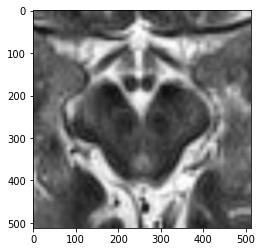

[1 0]


In [ ]:
print(tr_img.shape)
print(tr_lab.shape)
print(te_img.shape)
print(te_lab.shape)
print(tr_lab)
print(te_lab)
plt.imshow(tr_img[18],cmap='gray')
plt.show()
print(tr_lab[0])

Custom Model

In [ ]:
tr_img = tr_img.reshape(-1,512,512,3)


In [ ]:
#defining our model ,the description of the model is provided separately
from tensorflow.keras.layers import Dropout
lesion_Classifier=Sequential()
lesion_Classifier.add(Convolution2D(8,(3,3),input_shape=(512,512,3),activation='relu'))
lesion_Classifier.add(MaxPooling2D(pool_size=(2,2)))
lesion_Classifier.add(Convolution2D(16,(3,3),activation='relu'))
lesion_Classifier.add(MaxPooling2D(pool_size=(2,2)))
lesion_Classifier.add(Convolution2D(16,(3,3),activation='relu'))
lesion_Classifier.add(MaxPooling2D(pool_size=(2,2)))
lesion_Classifier.add(Dropout(0.3))
lesion_Classifier.add(Convolution2D(32,(3,3),activation='relu'))
lesion_Classifier.add(MaxPooling2D(pool_size=(2,2)))
lesion_Classifier.add(Convolution2D(32,(3,3),activation='relu'))
lesion_Classifier.add(MaxPooling2D(pool_size=(2,2)))
lesion_Classifier.add(Convolution2D(32,(3,3),activation='relu'))
lesion_Classifier.add(MaxPooling2D(pool_size=(2,2)))
lesion_Classifier.add(Dropout(0.3))
lesion_Classifier.add(Convolution2D(64,(3,3),activation='relu'))
lesion_Classifier.add(MaxPooling2D(pool_size=(2,2)))

lesion_Classifier.add(Flatten())

lesion_Classifier.add(Dense(1024,activation='relu'))
lesion_Classifier.add(Dense(128,activation='relu'))
lesion_Classifier.add(Dense(2,activation='sigmoid'))

In [ ]:
lesion_Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:

log_dir = os.path.join(
    "logs",
    "fit",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

name="images_ewith-sn-1".format(int(time.time()))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [ ]:

history=lesion_Classifier.fit(tr_img,tr_lab,epochs=500,validation_split=0.06,callbacks=[tensorboard_callback,es])

Epoch 1/500
14/14 [==============================] - 1s 98ms/step - loss: 1.6722 - accuracy: 0.6804 - val_loss: 0.5221 - val_accuracy: 0.7500
Epoch 2/500
14/14 [==============================] - 1s 53ms/step - loss: 0.6100 - accuracy: 0.6644 - val_loss: 0.6014 - val_accuracy: 0.7500
Epoch 3/500
14/14 [==============================] - 1s 52ms/step - loss: 0.5941 - accuracy: 0.6712 - val_loss: 0.6054 - val_accuracy: 0.7500
Epoch 4/500
14/14 [==============================] - 1s 51ms/step - loss: 0.5709 - accuracy: 0.6689 - val_loss: 0.5493 - val_accuracy: 0.7500
Epoch 5/500
14/14 [==============================] - 1s 52ms/step - loss: 0.5234 - accuracy: 0.7420 - val_loss: 0.5925 - val_accuracy: 0.7500
Epoch 6/500
14/14 [==============================] - 1s 51ms/step - loss: 0.5010 - accuracy: 0.7626 - val_loss: 0.5148 - val_accuracy: 0.7857
Epoch 7/500
14/14 [==============================] - 1s 51ms/step - loss: 0.4656 - accuracy: 0.7854 - val_loss: 0.5022 - val_accuracy: 0.7143
Epoch 

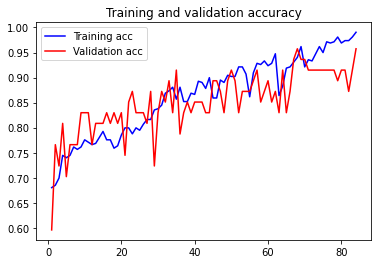

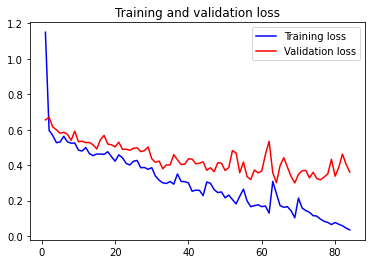

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
import seaborn as sn

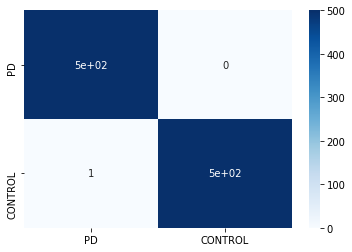

In [ ]:
cf_matrix = np.array(con_mat)
sn.heatmap(cf_matrix, annot=True, cmap='Blues',xticklabels=['PD','CONTROL'],yticklabels=['PD','CONTROL'])
plt.show()

In [ ]:
#saving the weights to h5 format
lesion_Classifier.save("parkinson final stage classifier_95.h5")
#model.save("model_vgg16_mypd_acc90.h5")

NameError: ignored

In [ ]:
model.load_weights('/content/parkinson first stage.h5')

OSError: ignored

Pre-trained VGG16 model

In [ ]:
from tensorflow.keras.applications import VGG16,InceptionResNetV2,InceptionV3,ResNet152,ResNet50,MobileNet,NASNetLarge
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import models

In [ ]:

vggmodel = VGG16(weights='imagenet',include_top=False,input_tensor=Input(shape=(512,512,3)),classes=8)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
vggmodel.trainable=False

In [ ]:
model = models.Sequential()
model.add(vggmodel)
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(124,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [ ]:
model.compile(optimizer='RMSProp',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
history = model.fit(tr_img,tr_lab,epochs=100,validation_split=0.1,callbacks=[es])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from sklearn import metrics
predictions = lesion_Classifier.predict_classes(data[0])


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:

label = [int(np.where(r==1)[0][0]) for r in data[1]]


In [ ]:

print(label)
print(predictions)


[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 

In [ ]:

report = metrics.classification_report(label,predictions)
confusion = metrics.confusion_matrix(label,predictions,labels=[0,1])

In [ ]:
print(report)
print(confusion)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       312
           1       0.98      0.98      0.98       154

    accuracy                           0.99       466
   macro avg       0.99      0.99      0.99       466
weighted avg       0.99      0.99      0.99       466

[[309   3]
 [  3 151]]


In [ ]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 16, 16, 512)       14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_25 (Dense)             (None, 1024)              134218752 
_________________________________________________________________
dense_26 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_27 (Dense)             (None, 124)               63612     
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 250       
Total params: 149,522,102
Trainable params: 134,807,414
Non-trainable params: 14,714,688
_______________________________

In [ ]:
#the prediction of all the images in the test set 'te_img' using the trained CNN
y_pred=lesion_Classifier.predict_classes(data[0])
print(y_pred[2])
labs=[]
#the confusion matrix based on the prediction in y_preds and the true labels stored in the 'te_lab'
for i in range(len(data[1])):
    if(1 in list(list(data[1])[i])):
        labs.append(list(list(data[1])[i]).index(1))
    else:
        labs.append(0)

con_mat = tf.math.confusion_matrix(labels=labs, predictions=y_pred)


0


[[309   3]
 [  3 151]]


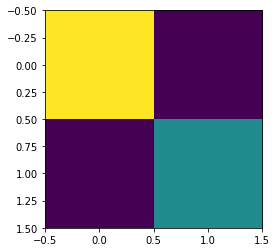

[0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1
 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0]



In [ ]:
con=con_mat.numpy()

print(con)

plt.imshow(con)
plt.show()
print(y_pred)
print()

In [ ]:
#accuracy measurement matrics for the test set using the confusion matrix 'con'
fn=con[0][1]
tn=con[1][1]
tp=con[0][0]
fp=con[1][0]
sen=tp/(tp+fn)
spe=tn/(tn+fp)
jac=tp/(tp+fp+fn)
dice=(2*tp)/((2*tp)+fp+fn)
acc=(tp+tn)/(tp+fn+tn+fp)
mcc=((tp*tn)-(fp*fn))/(((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in int_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in power
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
print(fn,'fn')
print(tn,'tn')
print(fp,'fp')
print(tp,'tp')
print(sen,'sen')
print(spe,'spe')
print(jac,'jac')
print(dice,'dice')
print(acc,'acc')
print(mcc,'mcc')


3 fn
151 tn
3 fp
309 tp
0.9903846153846154 sen
0.9805194805194806 spe
0.9809523809523809 jac
0.9903846153846154 dice
0.9871244635193133 acc
nan mcc


In [ ]:
print(te_lab)

In [ ]:
n=0

for i in range(len(te_lab)):
    print(list(list(te_lab)[i]))
    if(1 in list(list(te_lab)[i])):
        if(list(list(te_lab)[i]).index(1)==y_pred[i]):
            n=n+1
            print(list(list(te_lab)[i]).index(1),'  -  ',y_pred[i])

        
        else:
            print(' / ',list(list(te_lab)[i]).index(1),'  -  ',y_pred[i])
            plt.imshow(te_img[i])
            plt.show()
print((n/len(te_lab))*100)    

# **Testing phase**


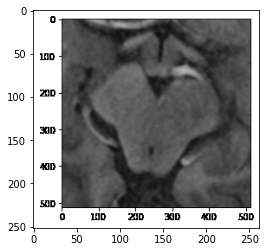

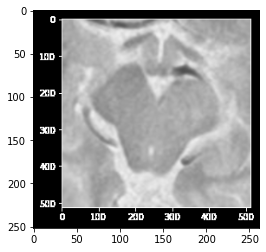

In [ ]:
im = cv2.imread('/content/14.png')
im_rev = cv2.bitwise_not(im)
plt.imshow(im)
plt.show()
plt.imshow(im_rev)
plt.show()